In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [14]:
train_dataset = np.loadtxt(open('train.csv', 'rb'), delimiter=',', skiprows=1)
target = [x[0] for x in train_dataset]
train = [x[1:] for x in train_dataset]
test = np.loadtxt(open('test.csv', 'rb'), delimiter=',', skiprows=1)

**Lets change form of some rows from a vector of length 784 to a 28x28 matrix to see how they look like.**

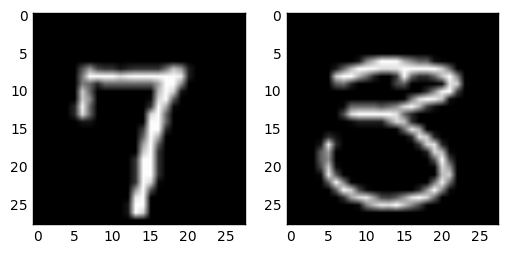

In [92]:
arrays_to_plot = [x.reshape(28, 28) for x in train[6:8]]
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(arrays_to_plot[0], cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.imshow(arrays_to_plot[1], cmap=plt.cm.gray)
plt.show()